In [1]:
import zarr 
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
import h5py

In [66]:
## Test
rand1 = np.random.randint(-100, 100,(10, 50, 50))
rand2 = np.random.randint(-100, 100,(10, 50, 50))

test1 = np.mean(rand1**2, axis=0) + np.mean(rand2**2, axis=0)
test2 = np.mean(rand1**2 + rand2**2, axis=0)

np.sum(test1) == np.sum(test2)

True

### Calc LLC4320

In [51]:
data = zarr.open('/Volumes/workDrive/LLC_Daily/LLC4320.zarr', mode='a')
list(data.keys())

['DRF',
 'DXG',
 'DYG',
 'Eddy_KE',
 'Mean_KE',
 'U',
 'V',
 'W',
 'depth',
 'lat',
 'lon',
 'oceQnet']

In [10]:
data['Mean_KE'] = zarr.create((4, 4500, 17280), chunks = (1, 500, 432))

In [11]:
for z in range(4):
    U = data['U'][0, z, :, :]
    V = data['V'][0, z, :, :]
    
    for t in tqdm(range(1, data['U'].shape[0])):
        U += data['U'][t, z, :, :]
        V += data['V'][t, z, :, :]
        
    U = U / 366
    V = V / 366
    
    data['Mean_KE'][z,:,:] = U**2 + V**2 

100%|█████████████████████████████████████████████████████████████████████| 365/365 [05:34<00:00,  1.09it/s]


In [13]:
data['Eddy_KE'] = zarr.create((4, 4500, 17280), chunks = (1, 500, 432))

In [14]:
for z in range(4):
    U = data['U'][0, z, :, :]**2
    V = data['V'][0, z, :, :]**2
    
    for t in tqdm(range(1, data['U'].shape[0])):
        U += data['U'][t, z, :, :]**2
        V += data['V'][t, z, :, :]**2
        
    U = U / 366
    V = V / 366
    
    data['Eddy_KE'][z,:,:] = U + V
    
data['Eddy_KE'][:] = data['Eddy_KE'][:] - data['Mean_KE'][:]

100%|█████████████████████████████████████████████████████████████████████| 365/365 [05:49<00:00,  1.04it/s]


### Calc SOhi

In [67]:
data = zarr.open('/Volumes/workDrive/KE/SOhi.zarr', mode='a')
list(data.keys())

['RF', 'TFLUX', 'UVEL', 'VVEL', 'WVEL', 'XG', 'YG', 'depth', 'lat', 'lon']

In [69]:
data['Mean_KE'] = zarr.create((4, 2344, 8640), chunks = (1, 293, 216))
data['Eddy_KE'] = zarr.create((4, 2344, 8640), chunks = (1, 293, 216))

In [70]:
for z in range(4):
    U = data['UVEL'][0, z, :, :]
    V = data['VVEL'][0, z, :, :]
    
    for t in tqdm(range(1, data['UVEL'].shape[0])):
        U += data['UVEL'][t, z, :, :]
        V += data['VVEL'][t, z, :, :]
        
    U = U / 365
    V = V / 365
    
    data['Mean_KE'][z,:,:] = U**2 + V**2 

100%|█████████████████████████████████████████████████████████████████████| 364/364 [03:14<00:00,  1.87it/s]


In [71]:
for z in range(4):
    U = data['UVEL'][0, z, :, :]**2
    V = data['VVEL'][0, z, :, :]**2
    
    for t in tqdm(range(1, data['UVEL'].shape[0])):
        U += data['UVEL'][t, z, :, :]**2
        V += data['VVEL'][t, z, :, :]**2
        
    U = U / 365
    V = V / 365
    
    data['Eddy_KE'][z,:,:] = U + V
    
data['Eddy_KE'][:] = data['Eddy_KE'][:] - data['Mean_KE'][:]

100%|█████████████████████████████████████████████████████████████████████| 364/364 [03:18<00:00,  1.83it/s]


### Calc SOSE

In [326]:
data = zarr.open('/Volumes/workDrive/KE/SOSE.zarr', mode='a')
print(list(data.keys()), data['UVEL'].shape)

['TFLUX', 'UVEL', 'VVEL', 'WVEL', 'depth', 'lat', 'lon'] (365, 4, 320, 2160)


In [327]:
data['Mean_KE'] = zarr.create((4, 320, 2160), chunks = (1, 320, 2160))
data['Eddy_KE'] = zarr.create((4, 320, 2160), chunks = (1, 320, 2160))

In [328]:
for z in range(4):
    U = data['UVEL'][0, z, :, :]
    V = data['VVEL'][0, z, :, :]
    
    for t in tqdm(range(1, data['UVEL'].shape[0])):
        U += data['UVEL'][t, z, :, :]
        V += data['VVEL'][t, z, :, :]
        
    U = U / 365
    V = V / 365
    
    data['Mean_KE'][z,:,:] = U**2 + V**2 

100%|████████████████████████████████████████████████████████| 364/364 [00:13<00:00, 27.58it/s]


In [329]:
for z in range(4):
    U = data['UVEL'][0, z, :, :]**2
    V = data['VVEL'][0, z, :, :]**2
    
    for t in tqdm(range(1, data['UVEL'].shape[0])):
        U += data['UVEL'][t, z, :, :]**2
        V += data['VVEL'][t, z, :, :]**2
        
    U = U / 365
    V = V / 365
    
    data['Eddy_KE'][z,:,:] = U + V
    
data['Eddy_KE'][:] = data['Eddy_KE'][:] - data['Mean_KE'][:]

100%|████████████████████████████████████████████████████████| 364/364 [00:13<00:00, 27.73it/s]


## Plot

In [2]:
LLC = zarr.open('/Volumes/workDrive/KE/LLC4320.zarr', mode='r')
SOhi = zarr.open('/Volumes/workDrive/KE/SOhi.zarr', mode='r')
SOSE = zarr.open('/Volumes/workDrive/KE/SOSE.zarr', mode='r')

In [3]:
def find2D(YC, XC, lat, lon):
    XC = np.asarray(XC)
    YC = np.asarray(YC)
    i1 = (XC - lon)**2
    i2 = (YC - lat)**2
    i3 = i1 + i2
    where = np.where(i3 == i3.min())
    return where[0][0], where[1][0]

In [4]:
def crop_region(xbound, ybound, XC, YC, data):
    
    if XC.ndim == 2:
        iy1, ix1 = find2D(YC = YC, XC = XC, lat=ybound[0], lon = xbound[0])
        iy2, ix2 = find2D(YC = YC, XC = XC, lat=ybound[0], lon = xbound[1])
        iy3, ix3 = find2D(YC = YC, XC = XC, lat=ybound[1], lon = xbound[0])
        iy4, ix4 = find2D(YC = YC, XC = XC, lat=ybound[1], lon = xbound[1])
        
        idx1 = np.min([ix1, ix2])
        idx2 = np.max([ix3, ix4])
        idy1 = np.min([iy1, iy2])
        idy2 = np.min([iy3, iy4])
        
        res = []
        for i in data:
            res.append(i[idy1:idy2+1,idx1:idx2+1])
        
        return YC[idy1:idy2+1,idx1:idx2+1], XC[idy1:idy2+1,idx1:idx2+1], res
    
    else:
        XC = np.asarray(XC)
        YC = np.asarray(YC)
        idx1 = np.argmin(abs(XC - xbound[0]))
        idx2 = np.argmin(abs(XC - xbound[1]))
        idy1 = np.argmin(abs(YC - ybound[0]))
        idy2 = np.argmin(abs(YC - ybound[1]))
        
        res = []
        for i in data:
            res.append(i[idy1:idy2+1, idx1:idx2+1])
        
        return YC[idy1:idy2+1], XC[idx1:idx2+1], res
                         

In [5]:
## Load Bathymetry
LLCbath = -np.load('/Volumes/workDrive/KE/LLC_Bathymetry.npy')
LLCbath[LLCbath == 0] = np.nan

SOhibath = loadmat('/Volumes/workDrive/KE/SOhi_Bathymetry.mat')
SOhibath = SOhibath['bathymetry'][:2344, :]
SOhibath[SOhibath ==0] = np.nan

SOSEbath = loadmat('/Volumes/workDrive/SIO_Backup/Data/Models/SOSE/grid.mat')
SOSEbath = -SOSEbath['Depth']
SOSEbath = np.swapaxes(SOSEbath, 0, 1)

In [7]:
## Load Ice Draft
ICE = h5py.File('/Volumes/workDrive/KE/ICE.mat')
ICE = ICE['Ice_Map'][:2344, :]
ICE[ICE!=0] = 1

In [8]:
Shelf_LLC = np.load('data2/LLC.npy')
Shelf_LLC_XC = np.load('data2/LLC_XC.npy') 
Shelf_LLC_YC = np.load('data2/LLC_YC.npy')

Shelf_SOhi = np.load('data2/SOhi.npy')
Shelf_SOhi_XC = np.load('data2/SOhi_XC.npy') 
Shelf_SOhi_YC = np.load('data2/SOhi_YC.npy')

Shelf_SOSE = np.load('data2/SOSE.npy')
Shelf_SOSE_XC = np.load('data2/SOSE_XC.npy')
Shelf_SOSE_YC = np.load('data2/SOSE_YC.npy')

In [40]:
Z = 1

In [41]:
LLCY, LLCX, LLC_res = crop_region(xbound = [103, 144], 
                              ybound = [-69, -63], 
                              XC = LLC['lon'], 
                              YC = LLC['lat'], 
                              data = [LLCbath, LLC['Mean_KE'][Z], LLC['Eddy_KE'][Z]])

In [42]:
SOhiY, SOhiX, SOhi_res = crop_region(xbound = [103, 144], 
                              ybound = [-69, -63], 
                              XC = np.asarray(SOhi['lon'])%360, 
                              YC = SOhi['lat'], 
                              data = [SOhibath, SOhi['Mean_KE'][Z],SOhi['Eddy_KE'][Z], ICE])

In [43]:
SOSEY, SOSEX, SOSE_res = crop_region(xbound = [103, 144], 
                              ybound = [-69, -63], 
                              XC = np.asarray(SOSE['lon'])%360, 
                              YC = SOSE['lat'], 
                              data = [SOSEbath, SOSE['Mean_KE'][Z],SOSE['Eddy_KE'][Z]])

In [44]:
S_LLC_Y, S_LLC_X, S_LLC = crop_region(xbound = [103, 144], 
                              ybound = [-69, -63], 
                              XC = Shelf_LLC_XC, 
                              YC = Shelf_LLC_YC, 
                              data = [Shelf_LLC])

In [45]:
S_SOhi_Y, S_SOhi_X, S_SOhi = crop_region(xbound = [103, 144], 
                              ybound = [-69, -63], 
                              XC = Shelf_SOhi_XC, 
                              YC = Shelf_SOhi_YC, 
                              data = [Shelf_SOhi])

In [46]:
S_SOSE_Y, S_SOSE_X, S_SOSE = crop_region(xbound = [103, 144], 
                              ybound = [-69, -63], 
                              XC = Shelf_SOSE_XC, 
                              YC = Shelf_SOSE_YC, 
                              data = [Shelf_SOSE])

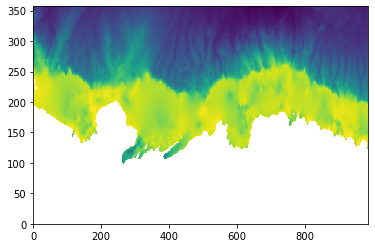

In [47]:
plt.pcolormesh(SOhi_res[0])

/var/folders/2n/5cjcyrz92xq2s13y29jhm27w0000gn/T/ipykernel_4123/630156471.py:45: UserWarning: No contour levels were found within the data range.
  a.contour(SOhiX, SOhiY, SOhi_res[3], levels=[0])
/var/folders/2n/5cjcyrz92xq2s13y29jhm27w0000gn/T/ipykernel_4123/630156471.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


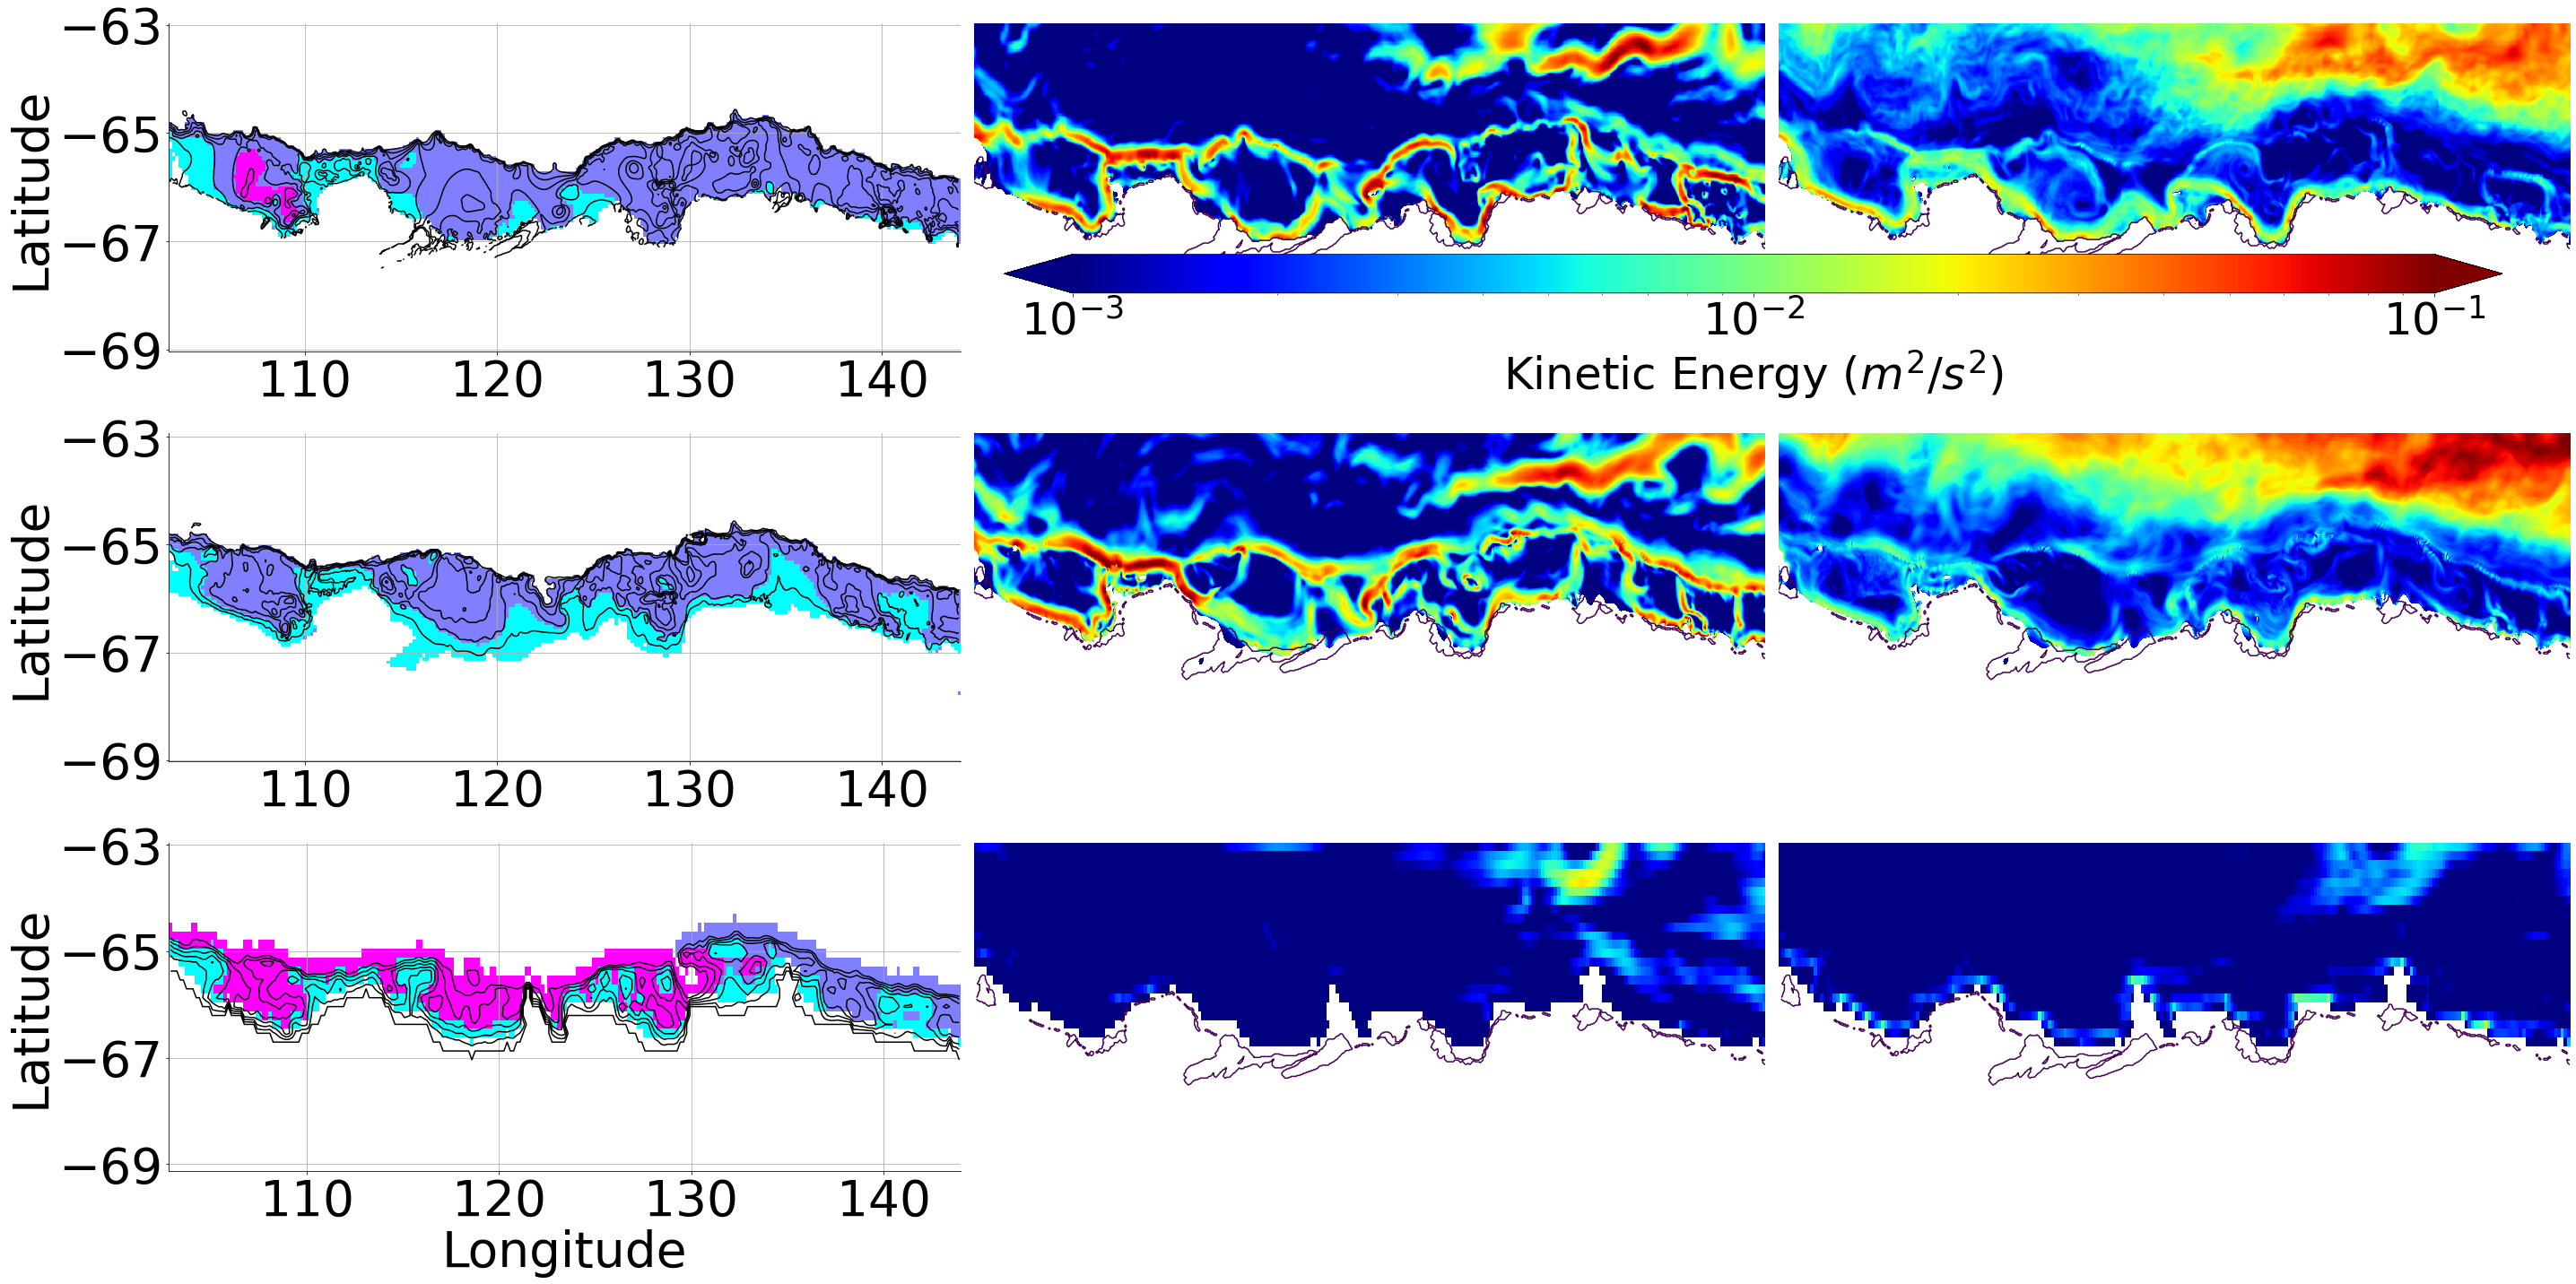

In [53]:
vmin = 0.001
vmax = 0.1
i1 = 2500
i2 = 3500
j1 = 9000
j2 = 10000

cmap = 'jet'

norm = matplotlib.colors.LogNorm(vmin = vmin, vmax = vmax, clip = False)

fig, ax = plt.subplots(figsize=(40, 20), nrows=3, ncols=3)

## Plot Bathymetry & Shelf Classification
ax[0,0].pcolormesh(S_SOhi_X, S_SOhi_Y, S_SOhi[0], cmap='cool', vmin = 1, vmax=3)
ax[0,0].contour(SOhiX, SOhiY, SOhi_res[0], levels=np.arange(-1001, 100, 200), colors=['k'], linestyles=['solid'])

ax[1,0].pcolormesh(S_LLC_X, S_LLC_Y, S_LLC[0], cmap='cool', vmin = 1, vmax=3)
ax[1,0].contour(LLCX, LLCY, LLC_res[0], levels=np.arange(-1001, 100, 200), colors=['k'], linestyles=['solid'])

ax[2,0].pcolormesh(S_SOSE_X, S_SOSE_Y, S_SOSE[0], cmap='cool', vmin = 1, vmax=3)
ax[2,0].contour(SOSEX, SOSEY, SOSE_res[0], levels=np.arange(-1001, 100, 200), colors=['k'], linestyles=['solid'])

## Plot MKE & EKE
im = ax[0,1].pcolormesh(SOhiX, SOhiY, SOhi_res[1], norm=norm, cmap=cmap)
ax[0,2].pcolormesh(SOhiX, SOhiY, SOhi_res[2], norm=norm, cmap=cmap)

ax[1,1].pcolormesh(LLCX, LLCY, LLC_res[1], norm=norm, cmap=cmap)
ax[1,2].pcolormesh(LLCX, LLCY, LLC_res[2], norm=norm, cmap=cmap)

ax[2,1].pcolormesh(SOSEX, SOSEY, SOSE_res[1], norm=norm, cmap=cmap)
ax[2,2].pcolormesh(SOSEX, SOSEY, SOSE_res[2], norm=norm, cmap=cmap)
    
# cbar_ax = fig.add_axes([0.38, 0.13, 0.6, 0.025])
# cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal', extend='both')
# cbar.ax.set_xlabel(r'Bathymetry (m)', size=40)
# cbar.ax.tick_params(labelsize=40)

cbar_ax2 = fig.add_axes([0.39, 0.77, 0.58, 0.03])
cbar2 = fig.colorbar(im, cax=cbar_ax2, orientation='horizontal', extend='both')
cbar2.ax.set_xlabel(r'Kinetic Energy ($m^2/s^2$)', size=50)
cbar2.ax.tick_params(labelsize=50)

for a in [ax[0,1], ax[0,2], ax[1,1], ax[1,2], ax[2,1], ax[2,2]]:
    a.contour(SOhiX, SOhiY, SOhi_res[3], levels=[0])
    a.set_xticks([])
    a.set_yticks([])
    a.spines['right'].set_color('none')
    a.spines['top'].set_color('none')
    a.spines['left'].set_color('none')
    a.spines['bottom'].set_color('none')
    
for a in [ax[0,0], ax[1,0], ax[2,0]]:
    a.set_ylabel('Latitude', fontsize=55)
    a.tick_params(axis='both', labelsize=55)
    a.spines['right'].set_color('none')
    a.spines['top'].set_color('none')
    a.grid()
    a.set_yticks([-69, -67,  -65, -63])
    
ax[2,0].set_xlabel('Longitude', fontsize=55)

plt.tight_layout()

plt.savefig('/Volumes/workDrive/KE/img/Wilkes_100.jpg', dpi=300)

# Amundsen

In [54]:
Z = 1

In [55]:
LLCY, LLCX, LLC_res = crop_region(xbound = [210, 270], 
                              ybound = [-76, -70], 
                              XC = np.asarray(LLC['lon'])%360, 
                              YC = LLC['lat'], 
                              data = [LLCbath, LLC['Mean_KE'][Z], LLC['Eddy_KE'][Z]])

In [56]:
SOhiY, SOhiX, SOhi_res = crop_region(xbound = [210, 270], 
                              ybound = [-76, -70], 
                              XC = np.asarray(SOhi['lon'])%360, 
                              YC = SOhi['lat'], 
                              data = [SOhibath, SOhi['Mean_KE'][Z],SOhi['Eddy_KE'][Z], ICE])

In [57]:
SOSEY, SOSEX, SOSE_res = crop_region(xbound = [210, 270], 
                              ybound = [-76, -70],  
                              XC = np.asarray(SOSE['lon'])%360, 
                              YC = SOSE['lat'], 
                              data = [SOSEbath, SOSE['Mean_KE'][Z],SOSE['Eddy_KE'][Z]])

In [58]:
S_LLC_Y, S_LLC_X, S_LLC = crop_region(xbound = [210, 270], 
                              ybound = [-76, -70],  
                              XC = Shelf_LLC_XC%360, 
                              YC = Shelf_LLC_YC, 
                              data = [Shelf_LLC])

In [59]:
S_SOhi_Y, S_SOhi_X, S_SOhi = crop_region(xbound = [210, 270], 
                              ybound = [-76, -70], 
                              XC = Shelf_SOhi_XC%360, 
                              YC = Shelf_SOhi_YC, 
                              data = [Shelf_SOhi])

In [60]:
S_SOSE_Y, S_SOSE_X, S_SOSE = crop_region(xbound = [210, 270], 
                              ybound = [-76, -70],  
                              XC = Shelf_SOSE_XC%360, 
                              YC = Shelf_SOSE_YC, 
                              data = [Shelf_SOSE])

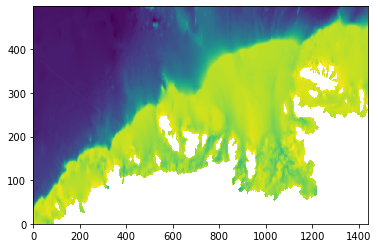

In [61]:
plt.pcolormesh(SOhi_res[0])

/var/folders/2n/5cjcyrz92xq2s13y29jhm27w0000gn/T/ipykernel_4123/1429792794.py:18: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[1,0].pcolormesh(S_LLC_X%360, S_LLC_Y, S_LLC[0], cmap='cool', vmin = 1, vmax=3)
/var/folders/2n/5cjcyrz92xq2s13y29jhm27w0000gn/T/ipykernel_4123/1429792794.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[1,1].pcolormesh(LLCX, LLCY, LLC_res[1], norm=norm, cmap=cmap)
/var/folders/2n/5cjcyrz92xq2s13y29jhm27w0000gn/T/ipykernel_4123/1429792794.py:29: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonic

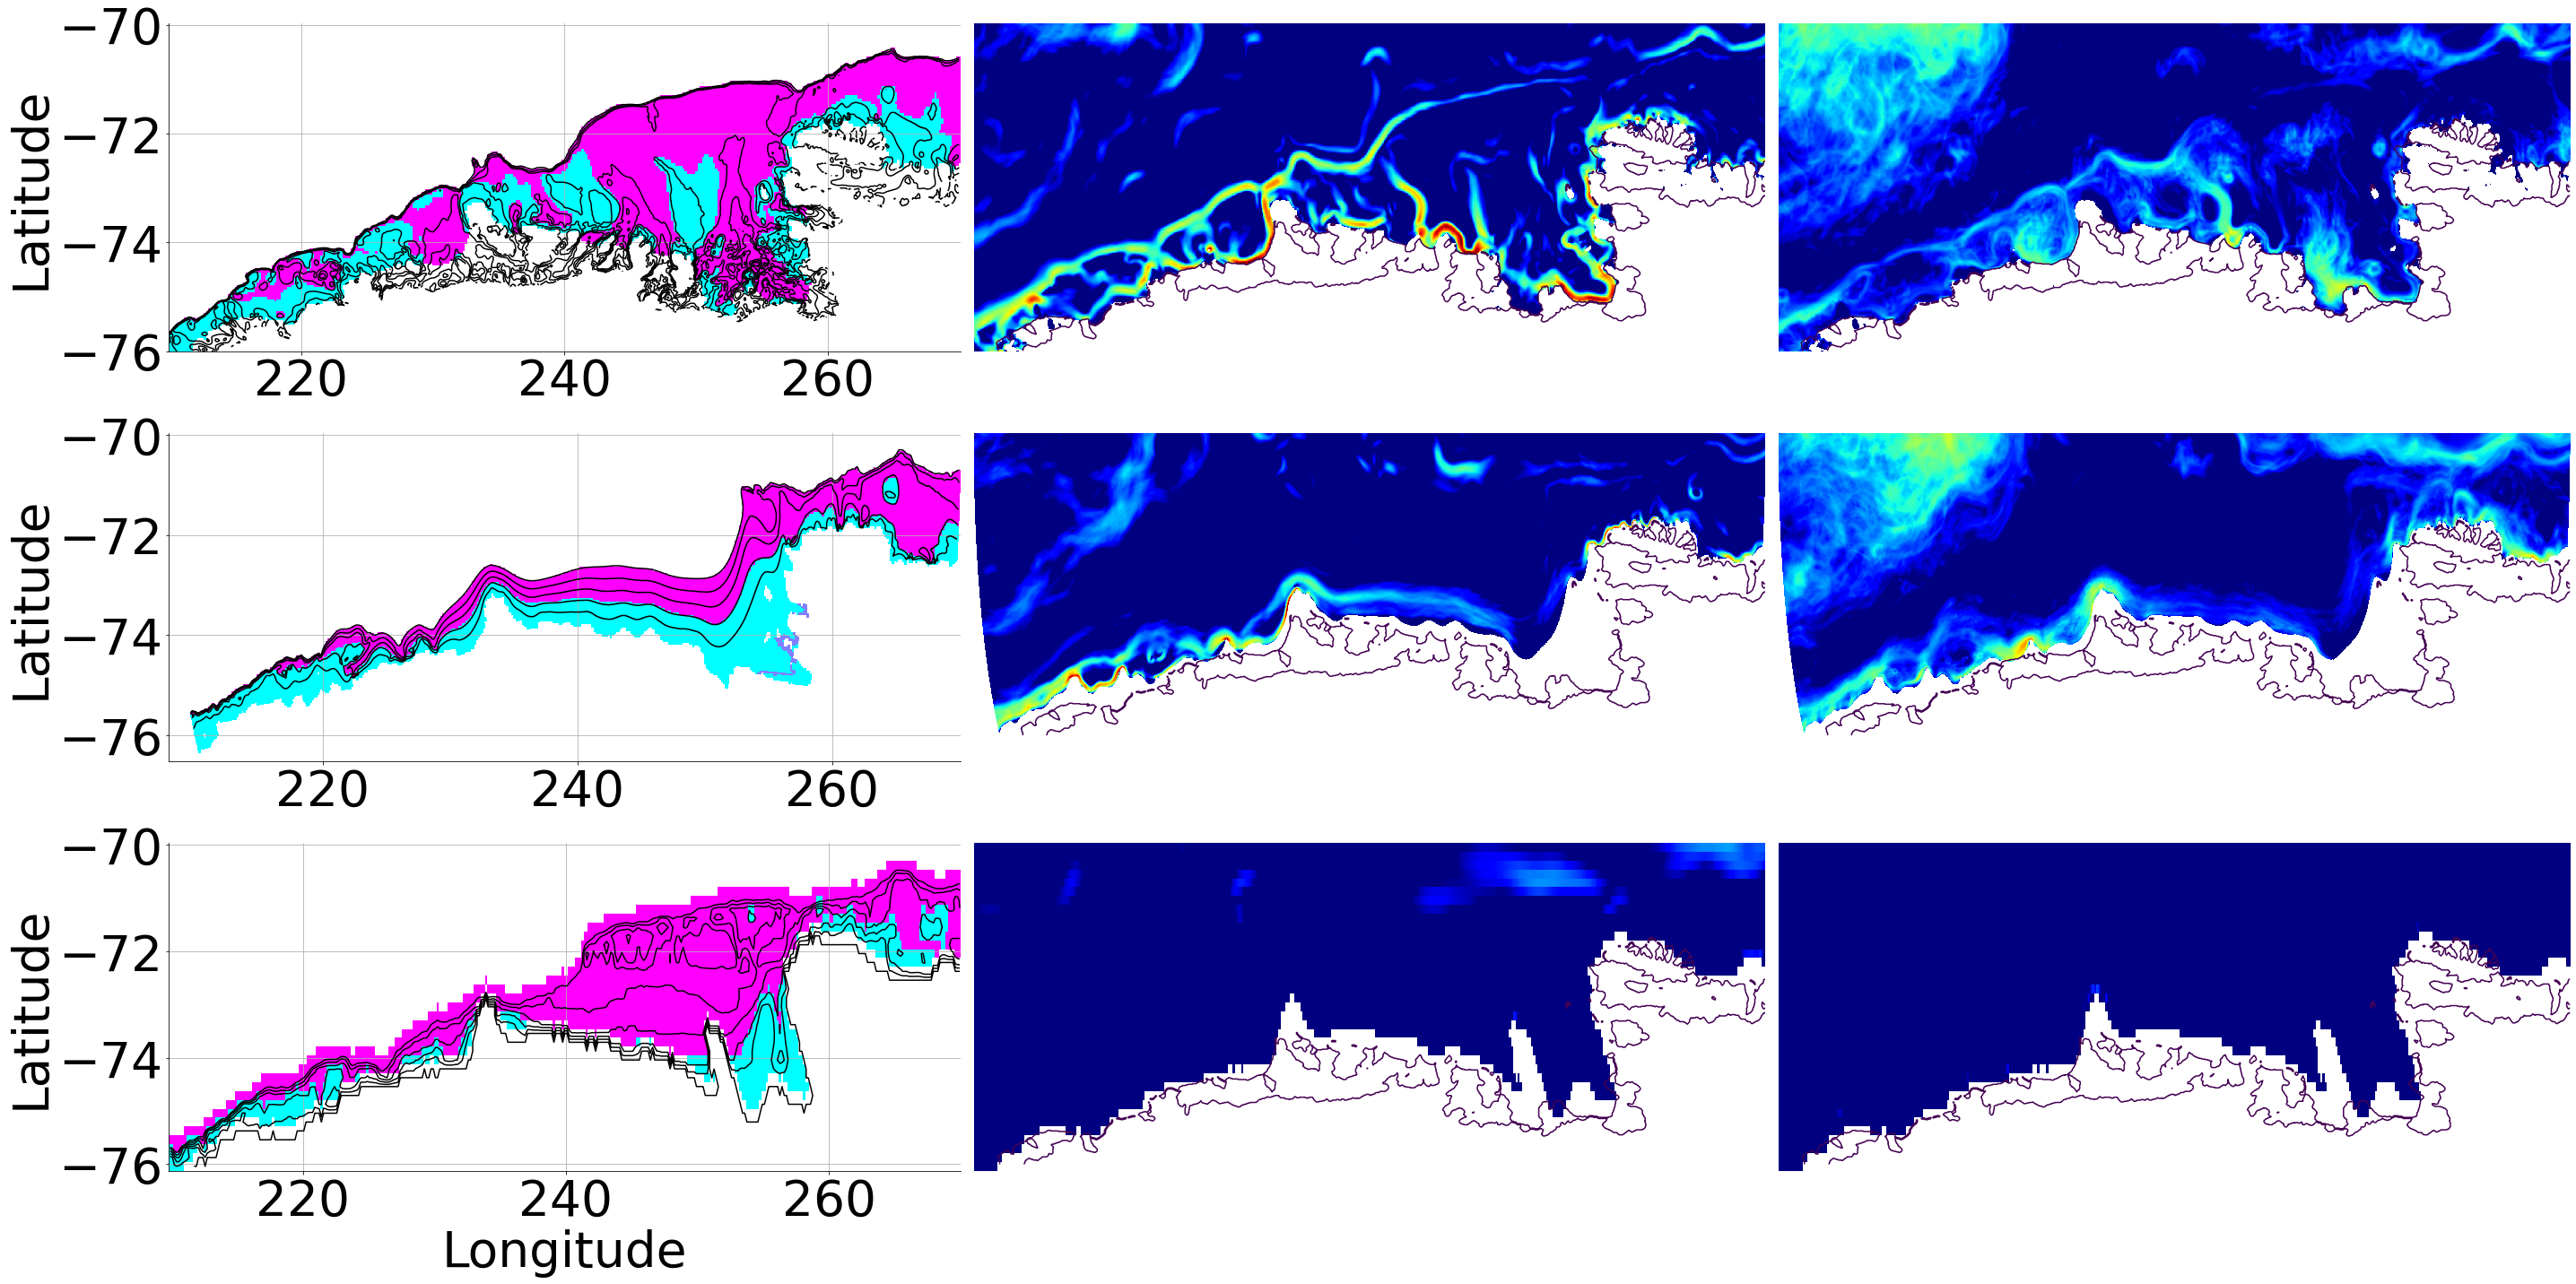

In [63]:
vmin = 0.001
vmax = 0.1
i1 = 2500
i2 = 3500
j1 = 9000
j2 = 10000

cmap = 'jet'

norm = matplotlib.colors.LogNorm(vmin = vmin, vmax = vmax, clip = False)

fig, ax = plt.subplots(figsize=(40, 20), nrows=3, ncols=3)

## Plot Bathymetry & Shelf Classification
ax[0,0].pcolormesh(S_SOhi_X%360, S_SOhi_Y, S_SOhi[0], cmap='cool', vmin = 1, vmax=3)
ax[0,0].contour(SOhiX, SOhiY, SOhi_res[0], levels=np.arange(-1001, 100, 200), colors=['k'], linestyles=['solid'])

ax[1,0].pcolormesh(S_LLC_X%360, S_LLC_Y, S_LLC[0], cmap='cool', vmin = 1, vmax=3)
ax[1,0].contour(LLCX, LLCY, LLC_res[0], levels=np.arange(-1001, 100, 200), colors=['k'], linestyles=['solid'])

ax[2,0].pcolormesh(S_SOSE_X, S_SOSE_Y, S_SOSE[0], cmap='cool', vmin = 1, vmax=3)
ax[2,0].contour(SOSEX, SOSEY, SOSE_res[0], levels=np.arange(-1001, 100, 200), colors=['k'], linestyles=['solid'])

## Plot MKE & EKE
im = ax[0,1].pcolormesh(SOhiX, SOhiY, SOhi_res[1], norm=norm, cmap=cmap)
ax[0,2].pcolormesh(SOhiX, SOhiY, SOhi_res[2], norm=norm, cmap=cmap)

ax[1,1].pcolormesh(LLCX, LLCY, LLC_res[1], norm=norm, cmap=cmap)
ax[1,2].pcolormesh(LLCX, LLCY, LLC_res[2], norm=norm, cmap=cmap)

ax[2,1].pcolormesh(SOSEX, SOSEY, SOSE_res[1], norm=norm, cmap=cmap)
ax[2,2].pcolormesh(SOSEX, SOSEY, SOSE_res[2], norm=norm, cmap=cmap)
    
# cbar_ax = fig.add_axes([0.38, 0.13, 0.6, 0.025])
# cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal', extend='both')
# cbar.ax.set_xlabel(r'Bathymetry (m)', size=40)
# cbar.ax.tick_params(labelsize=40)

# cbar_ax2 = fig.add_axes([0.39, 0.71, 0.58, 0.02])
# cbar2 = fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal', extend='both')
# cbar2.ax.set_xlabel(r'Kinetic Energy ($m^2/s^2$)', size=60)
# cbar2.ax.tick_params(labelsize=50)

for a in [ax[0,1], ax[0,2], ax[1,1], ax[1,2], ax[2,1], ax[2,2]]:
    a.contour(SOhiX, SOhiY, SOhi_res[3], levels=[0])
    a.set_xticks([])
    a.set_yticks([])
    a.spines['right'].set_color('none')
    a.spines['top'].set_color('none')
    a.spines['left'].set_color('none')
    a.spines['bottom'].set_color('none')
    
for a in [ax[0,0], ax[1,0], ax[2,0]]:
    a.set_ylabel('Latitude', fontsize=55)

    a.tick_params(axis='both', labelsize=55)
    a.spines['right'].set_color('none')
    a.spines['top'].set_color('none')
    a.grid()
    a.set_yticks([-76, -74, -72, -70])
    
ax[2,0].set_xlabel('Longitude', fontsize=55)

# for a in ax.flat:
#     a.set_ylim(-76, -70)

plt.tight_layout()

plt.savefig('/Volumes/workDrive/KE/img/Amundsen_100.jpg', dpi=300)

## Total KE

In [65]:
SOSE_mask = np.load('/Volumes/workDrive/KE/SOSE_mask.npy')
SOhi_mask = np.load('/Volumes/workDrive/KE/SOHI_mask.npy')
LLC_mask = np.load('/Volumes/workDrive/KE/LLC_mask.npy')

In [67]:
LLC_MKE  = LLC['Mean_KE'][1] * LLC_mask
LLC_EKE  = LLC['Eddy_KE'][1] * LLC_mask

SOHI_MKE  = SOhi['Mean_KE'][1] * SOhi_mask
SOHI_EKE  = SOhi['Eddy_KE'][1] * SOhi_mask

SOSE_MKE  = SOSE['Mean_KE'][1][:138,:] * SOSE_mask
SOSE_EKE  = SOSE['Eddy_KE'][1][:138,:] * SOSE_mask

In [80]:
SOSE_MKE[SOSE_MKE==0] = np.nan
SOSE_EKE[SOSE_EKE==0] = np.nan

In [83]:
SOHI_MKE[SOHI_MKE==0] = np.nan
SOHI_EKE[SOHI_EKE==0] = np.nan

In [91]:
LLC_MKE[LLC_MKE==0] = np.nan
LLC_EKE[LLC_EKE==0] = np.nan

In [112]:
np.nanmean(SOHI_EKE), np.nanmean(LLC_EKE), np.nanmean(SOSE_EKE)

(0.002515877059804883, 0.0023092967243210382, 0.000511586664880341)

In [113]:
np.nanmean(SOHI_MKE), np.nanmean(LLC_MKE), np.nanmean(SOSE_MKE)

(0.004048440694475872, 0.004947751211216521, 0.0010025669026889072)